# Machine learning customer segmentation project
In this project, I will build a machine learning model for customer segmentation. It involves unsupervised learning, using an unlabeled training set for clustering. I intend to perform clustering to summarize customer segments of a retail store, identifying an ideal client group and building a loyalty program.

I will use the following pipeline, based on CRISP-DM framework:

1. Define the business problem.
2. Initial data understanding.
3. Exploratory data analysis and feature engineering.
4. Data cleaning and preprocessing.
5. Group customers into clusters, modelling.
6. Interpret the results, analysing the groups created (profiling). 
7. Provide marketing suggestions and the loyalty program.
8. Estimate financial results.

# 1. Business problem

Problem statement:
- A retail store aims to gain a deeper understanding of its customer characteristics and to strategically utilize this knowledge. One of its primary goals is to proficiently segment its clientele, allowing for enhanced comprehension of its customers' preferences. This, in turn, facilitates the adaptation of products to cater to the unique requirements, behaviors, and concerns of various customer segments.
- Additionally, the store wants to build better connections with customers and keep them coming back by starting a loyalty program. They'll look closely at how customers behave, what they buy, and what they like. Then, they'll create a loyalty program with special rewards and benefits just for different groups of customers. This special treatment doesn't just keep customers coming back; it also makes them feel valued and part of the store's family, which makes them like the brand even more.

I will be using the RFM model for clustering analysis. 

The RFM model is a marketing and customer segmentation technique used to analyze and categorize customers based on their recent purchasing behavior. RFM stands for:

- Recency: This measures how recently a customer has made a purchase. Customers who have made a purchase more recently are typically considered more valuable.
- Frequency: This measures how often a customer makes purchases. Customers who make frequent purchases are often more engaged and loyal.
- Monetary Value: This assesses the amount of money a customer has spent on purchases. Customers who have spent more are usually considered higher-value customers.

By analyzing these three factors, businesses can categorize their customers into different segments, such as "high-value and highly engaged" or "low-value and inactive." This segmentation allows companies to tailor their marketing strategies and offers to each group more effectively, ultimately improving customer retention and maximizing revenue.

Considering everything mentioned above, the project objectives are:

1. Identify customer groups and create profiles for them. By doing this, it will be possible to assess common characteristics of client segments, such as product preferences and demographic information.
2. Design a loyalty program based on an ideal customer group with the intention of improving client retention and increasing revenue.
3. Achieve satisfactory financial results through customer segmentation and the loyalty program, which will be estimated in final steps.

By doing this, the business problem will be resolved.

### Importing the libraries

In [2]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Date manipulation.
from datetime import datetime

# Utils.
from scripts.eda_utils import *

# 2. Initial data understanding
The dataset was collected from kaggle: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [3]:
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Data dictionary
<b>People</b><br>

<b>ID:</b> Customer's unique identifier<br>
<b>Year_Birth:</b> Customer's birth year<br>
<b>Education:</b> Customer's education level<br>
<b>Marital_Status:</b> Customer's marital status<br>
<b>Income:</b> Customer's yearly household income<br>
<b>Kidhome:</b> Number of children in customer's household<br>
<b>Teenhome:</b> Number of teenagers in customer's household<br>
<b>Dt_Customer:</b> Date of customer's enrollment with the company<br>
<b>Recency:</b> Number of days since customer's last purchase<br>
<b>Complain:</b> 1 if the customer complained in the last 2 years, 0 otherwise<br>

<b>Products</b><br>

<b>MntWines:</b> Amount spent on wine in last 2 years<br>
<b>MntFruits:</b> Amount spent on fruits in last 2 years<br>
<b>MntMeatProducts:</b> Amount spent on meat in last 2 years<br>
<b>MntFishProducts:</b> Amount spent on fish in last 2 years<br>
<b>MntSweetProducts:</b> Amount spent on sweets in last 2 years<br>
<b>MntGoldProds:</b> Amount spent on gold in last 2 years<br>

<b>Promotion</b>
    
<b>NumDealsPurchases:</b> Number of purchases made with a discount<br>
<b>AcceptedCmp1:</b> 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
<b>AcceptedCmp2:</b> 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
<b>AcceptedCmp3:</b> 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
<b>AcceptedCmp4:</b> 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
<b>AcceptedCmp5:</b> 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
<b>Response:</b> 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

<b>Place</b>
    
<b>NumWebPurchases:</b> Number of purchases made through the company’s website<br>
<b>NumCatalogPurchases:</b> Number of purchases made using a catalogue<br>
<b>NumStorePurchases:</b> Number of purchases made directly in stores<br>
<b>NumWebVisitsMonth:</b> Number of visits to company’s website in the last month<br>

Looking at dataset general information.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 2240 rows and 29 columns.


There are some missing values in income. Furthermore, some features seem to be in the incorrect data type.

Looking at some descriptive statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Insights:
1. At a glance, as expected, Income has some outliers. Moreover, the average income is $52247.251354.
2. When analysing kidhome and teenhome median values, seems like the majority of the customers don't have children.
3. Customers' recency is, on average, 49 days. This is a high value, which motivates even more our loyalty program. The retail store must plan strategies to decrease its recency and estimulate clients to buy more.
4. Customers spent, on average, more money on wine products. This is expected since they must be more expensive than the others.
5. On average, store and web are the customers' favorite ways to buy products.
6. The number of web visits per month and the accepted campaigns rates are low. This reinforces the worthiness of our clustering analysis and loyalty program.
7. Min year_birth is 1893.0. This outlier represents inconsistent information, which I will treat further. For the other features, seems like there are no wrong values.

Looking at missing and duplicated values.

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df['ID'].duplicated().sum()

0

In [10]:
df.duplicated().sum()

0

There are some missing values in income. Moreover, there are no duplicated values.

I will rename columns in order to turn data manipulation easier. Also, I will remove z columns because I don't have information about what they represent. Id column will also be removed because it is useless for modelling and eda.

In [11]:
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID'], inplace=True)

In [12]:
df.columns = [x.lower() for x in df.columns]

In [13]:
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


I will convert dt_customer to the correct data type, datetime. This will be useful for creating new features further.

In [14]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y')

In [15]:
print(f'The first customer enrolled with the company at {df.dt_customer.min()}.')
print(f'The last customer enrolled with the company at {df.dt_customer.max()}.')

The first customer enrolled with the company at 2012-07-30 00:00:00.
The last customer enrolled with the company at 2014-06-29 00:00:00.


# Exploratory data analysis and feature engineering
I will explore the dataset in order to get a better undestanding of how the features are individually distributed, the relashionships between them, correlations, trends and possible insights. Moreover, based on the exploration, I will do some feature engineering, in order to extract the maximum amount of information from the available attributes.

I will obtain categorical features and numerical features separate lists in order to turn data visualization and exploration easier.

In [16]:
numerical_features = df.select_dtypes('number').columns.tolist()
categorical_features = df.select_dtypes('object').columns.tolist()

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)}. They are: ')
print(categorical_features)

There are 23 numerical features. They are: 
['year_birth', 'income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'response']

There are 2. They are: 
['education', 'marital_status']


I will look at categorical features unique values. Cardinality is an important factor when choosing an encoding technique for them.

In [17]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {df[feature].nunique()} unique values. They are: ')
    print(df[feature].value_counts(normalize=True))
    print()

education
----------------------------------------
There are 5 unique values. They are: 
education
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: proportion, dtype: float64

marital_status
----------------------------------------
There are 8 unique values. They are: 
marital_status
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: proportion, dtype: float64



For education, there is an ordinal relationship. Thus, ordinal encoding might be a possibility for encoding it. Moreover, seems like in both attributes there are domains that can be merged together in one, like YOLO, Absurd, Alone in Single. The same for education. This will reduce the cardinality while preserving the original information.

# Univariate analysis
I will do univariate analysis below in order to see which are the typical values of each feature for the store's customers.

# Numerical features distributions
I will look at numerical features distributions below in order to see if there are skewed distributions and which are the most common values for the store's customers numeric attributes.

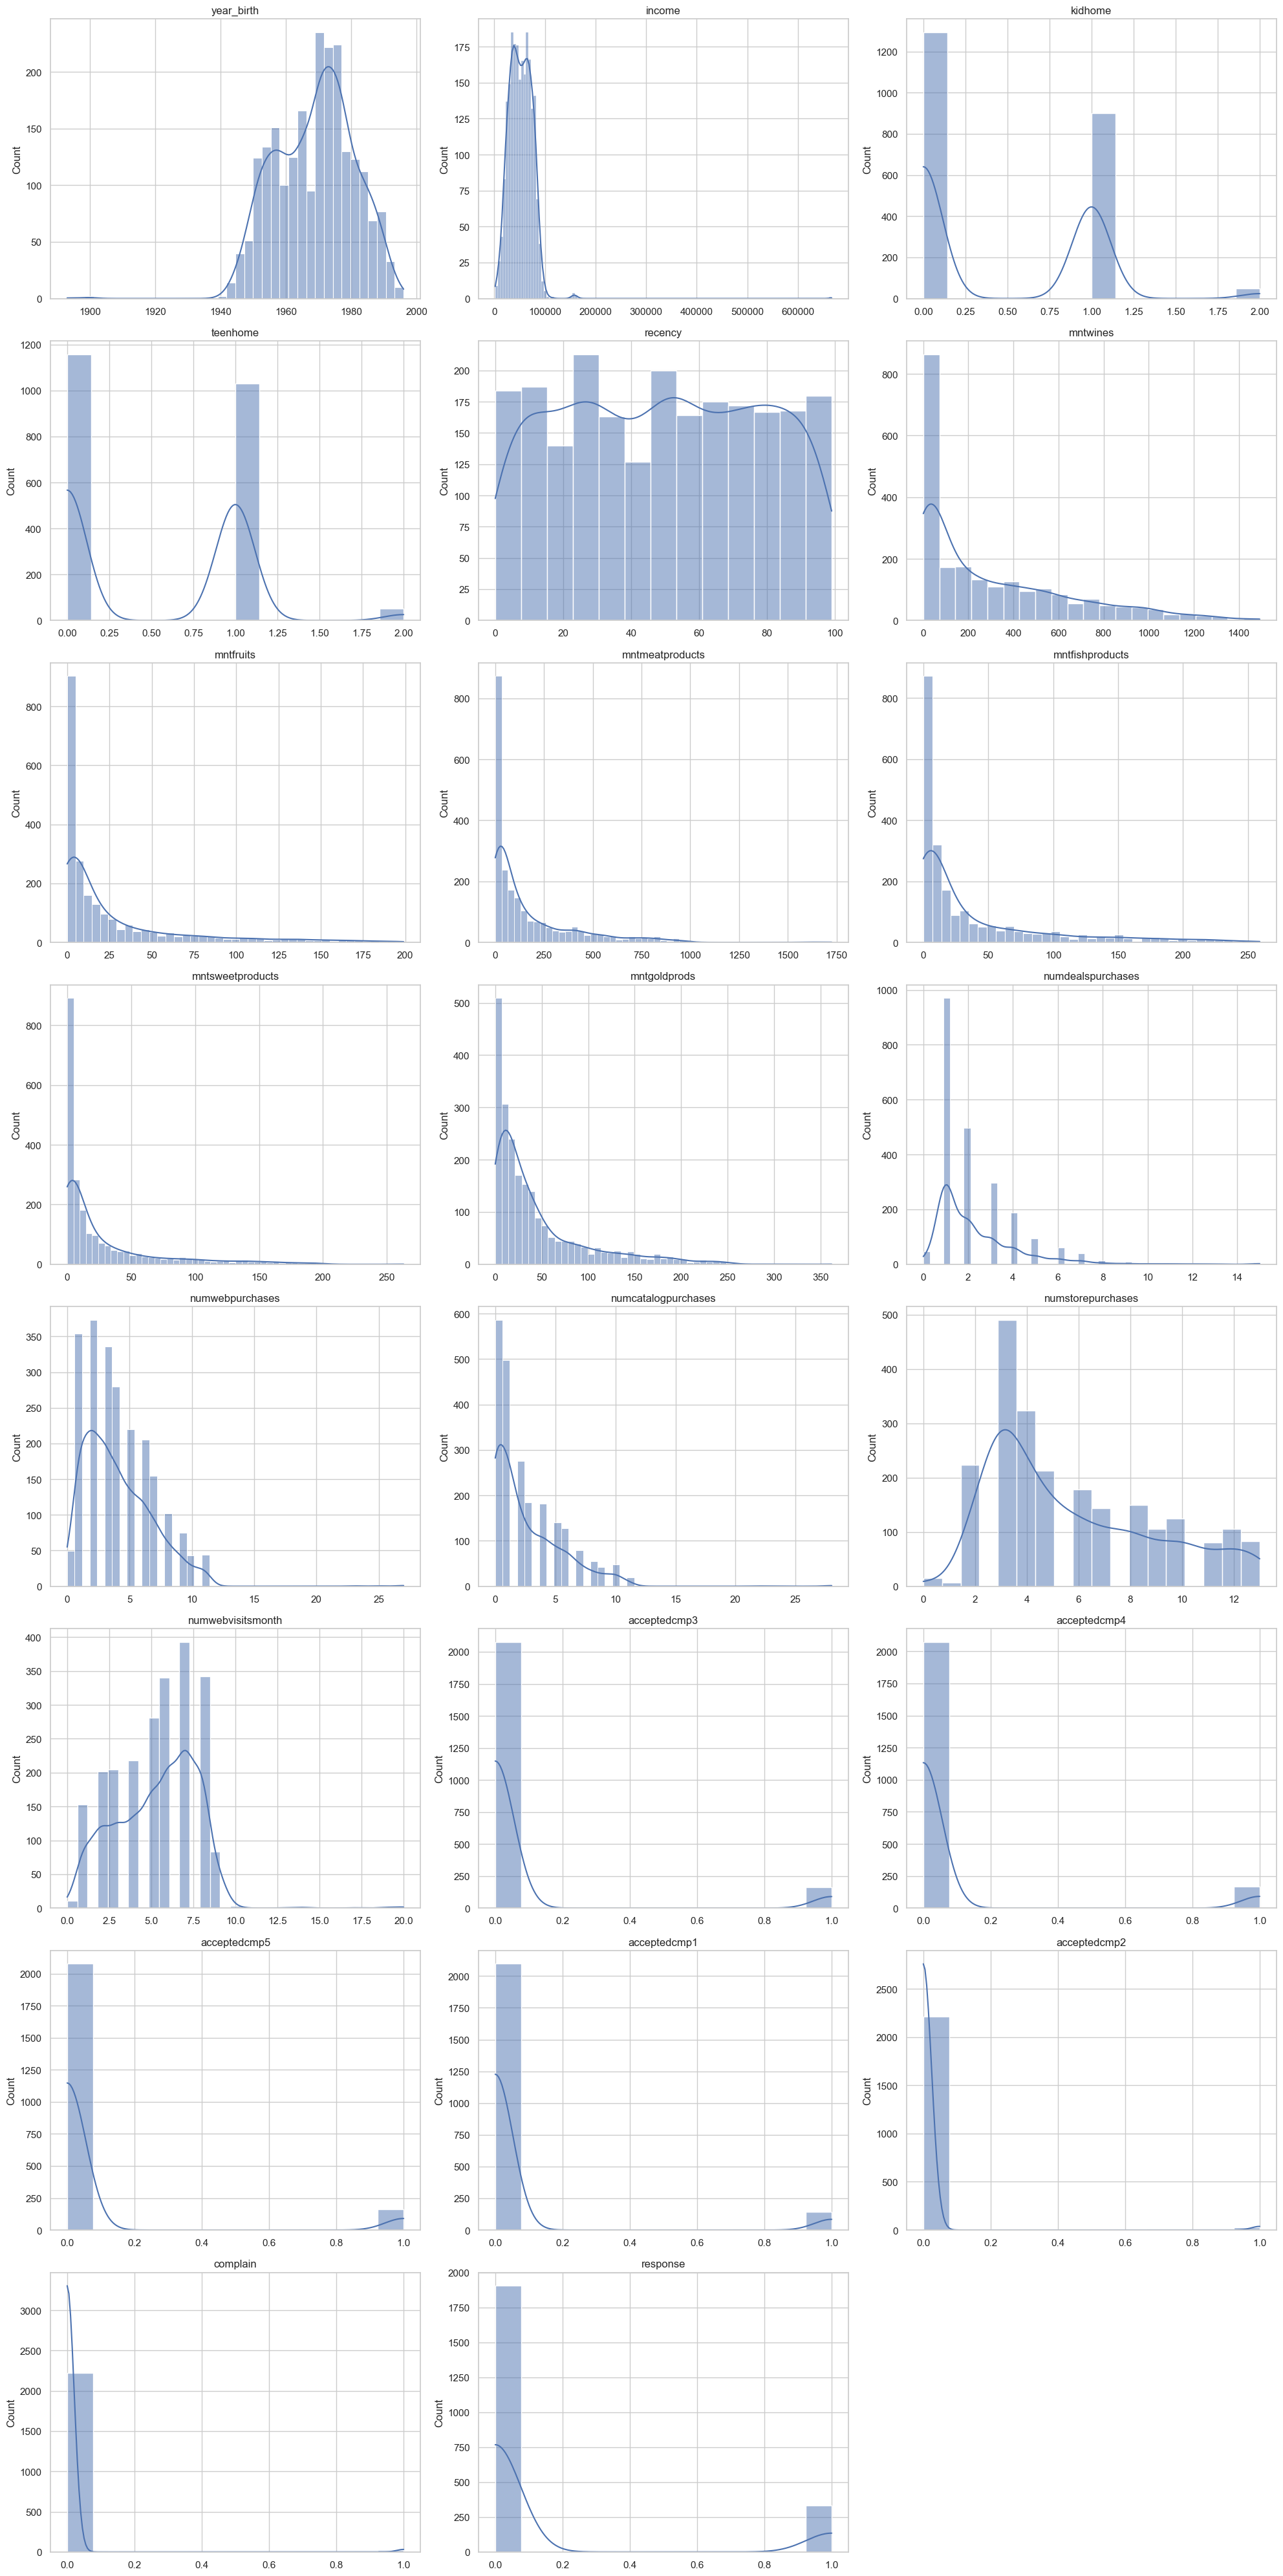

In [18]:
sns_plots(data=df, features=numerical_features, histplot=True, kde=True)

Insights:
1. There are some outliers that represent inconsistent values in year_birth. Moreover, most of the customers were born close to 1980.
2. Most of the incomes are at low values. There are just a few outliers representing customers with very high incomes.
3. Most of the customers have no children. Some of them have 1 kidhome or teenhome. Very few have two.
4. The customers' recencies are fairly distributed. Probably, recency will not be determinant for the clustering models.
5. Features representing the amount spent on a product are right-skewed. This means that most of the customers spent lower amounts, while some spent higher amounts of money. Particularly, wines represent the product with the highest average amount spent.
6. Features representing the number of purchases are also a bit right-skewed. In general, customers tend to make more purchases on web or at the store. There are some outliers in all of these features meaning customers that make lots of purchases.
7. The store's campaigns are not being effective! The proportion of customers who accepted any of the campaigns is very low. This motivates our clustering analysis! Probably the company is promoting the same campaigns for all the clientele. By segmenting the customers, it will be possible to make targeted campaigns, improving this alarmant indicator.

### Outliers
I will look at outliers in the data in order to see if they represent inconsistent information like measurement errors. Once I do this, I will decide if I will treat them or not. Moreover, I will plot boxplots below for visualization purposes.

In [19]:
outlier_analysis_features = ['year_birth', 'income', 'recency', 'mntwines',
                            'mntfruits', 'mntmeatproducts', 'mntfishproducts',
                            'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 
                            'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']

outlier_indexes, outlier_counts, total_outliers = check_outliers(data=df, features=outlier_analysis_features)

There are 1247 outliers in the dataset.

Number (percentage) of outliers per feature: 

year_birth: 3 (0.13)%
income: 8 (0.36)%
recency: 0 (0.0)%
mntwines: 35 (1.56)%
mntfruits: 227 (10.13)%
mntmeatproducts: 175 (7.81)%
mntfishproducts: 223 (9.96)%
mntsweetproducts: 248 (11.07)%
mntgoldprods: 207 (9.24)%
numdealspurchases: 86 (3.84)%
numwebpurchases: 4 (0.18)%
numcatalogpurchases: 23 (1.03)%
numstorepurchases: 0 (0.0)%
numwebvisitsmonth: 8 (0.36)%


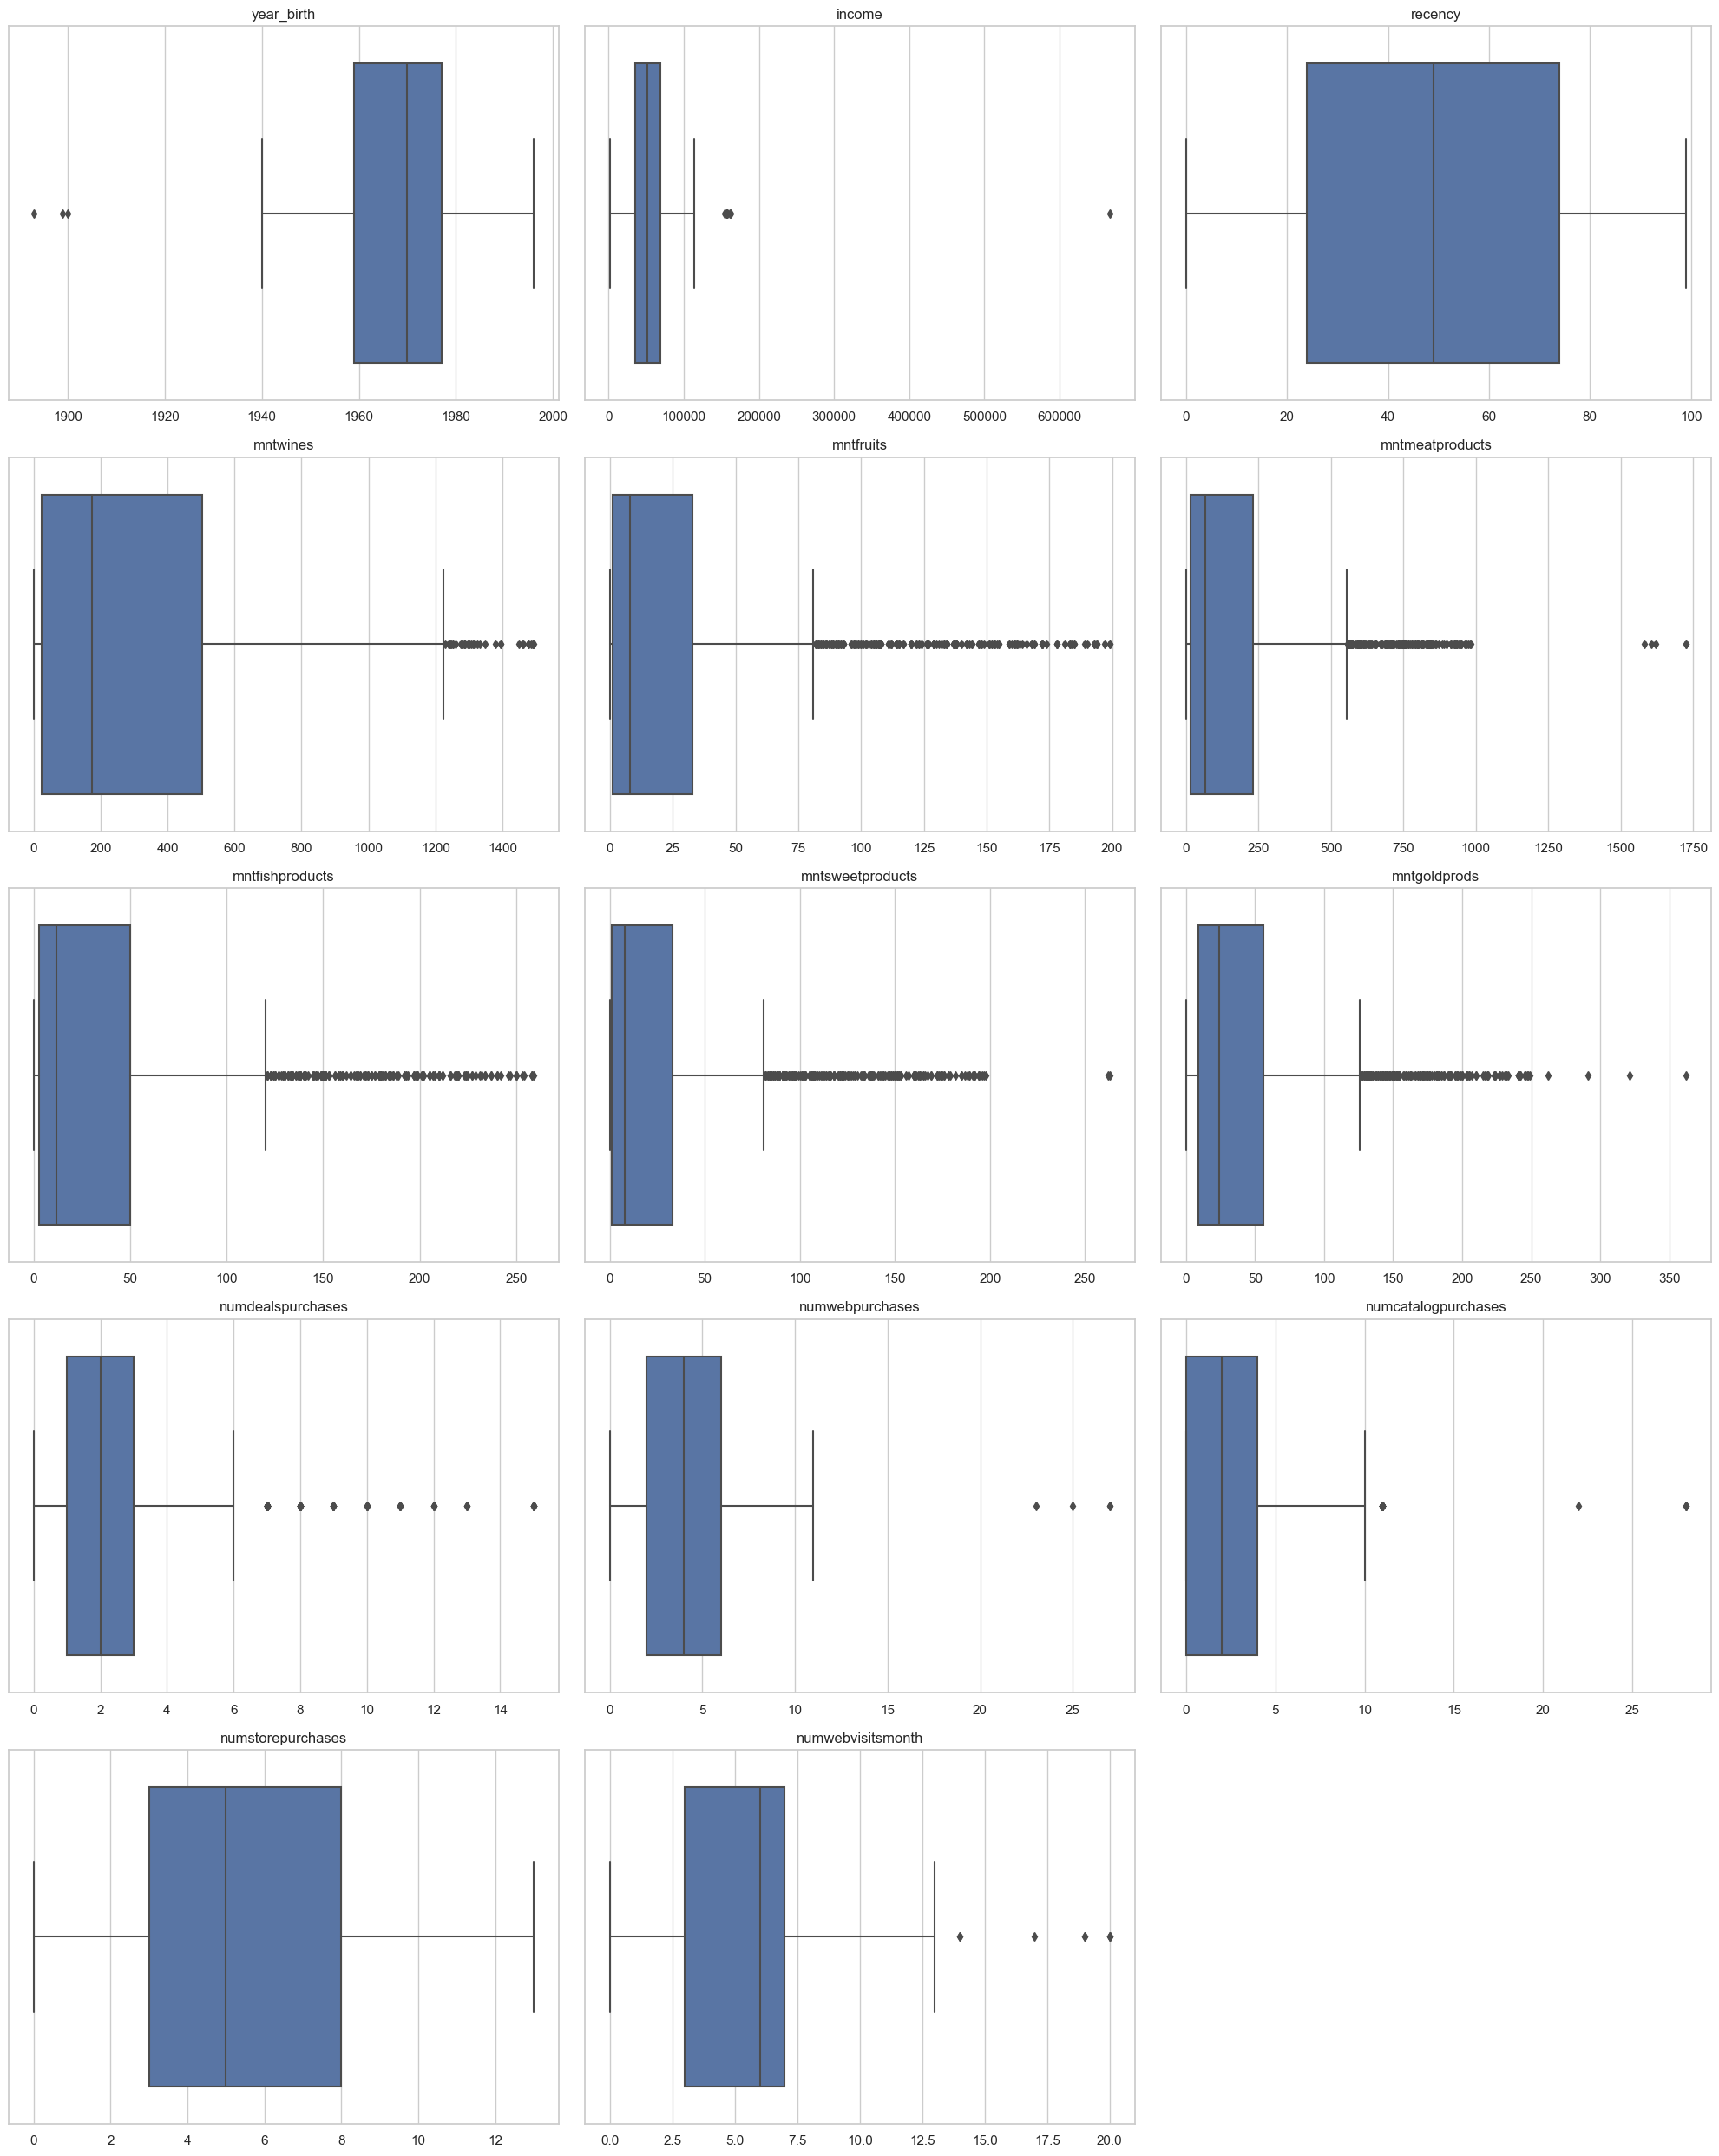

In [20]:
sns_plots(data=df, features=outlier_analysis_features, outliers=True)

Insights:
1. As expected, features representing the amount spent on different product types have lots of outliers. However, naturally some customers buy more than others. Thus, once they don't represent inconsistent information, I will not drop any of these outliers.
2. Year birth and income have very few outliers, which are far from the other points. Particularly, for year birth, there are customers who were born before 1900. Moreover, there is a client who has an income higher than $600,000. These observations might represent inconsistent information, thus, I will drop them.
3. In general, clustering algorithms are sensitive to outliers. By dropping year birth and income outliers (inconsistent information), we can help these algorithms to perform better. For the other features like the amount spent on products, I will not remove any. Imagine new customers come and we want to assign them into clusters. Well, if they tend to buy more, am I just going to remove all of them? Of course not. Finally, by applying dimensionality reduction before modelling, it will be possible to minimize anomalies effects.

Dropping the outliers.

In [21]:
to_drop_indexes = outlier_indexes['income'] + outlier_indexes['year_birth']
df.drop(to_drop_indexes, inplace=True)

### Categorical features distributions
I will look at categorical features countplots below in order to see which are the most common characteristics of the store's customers.

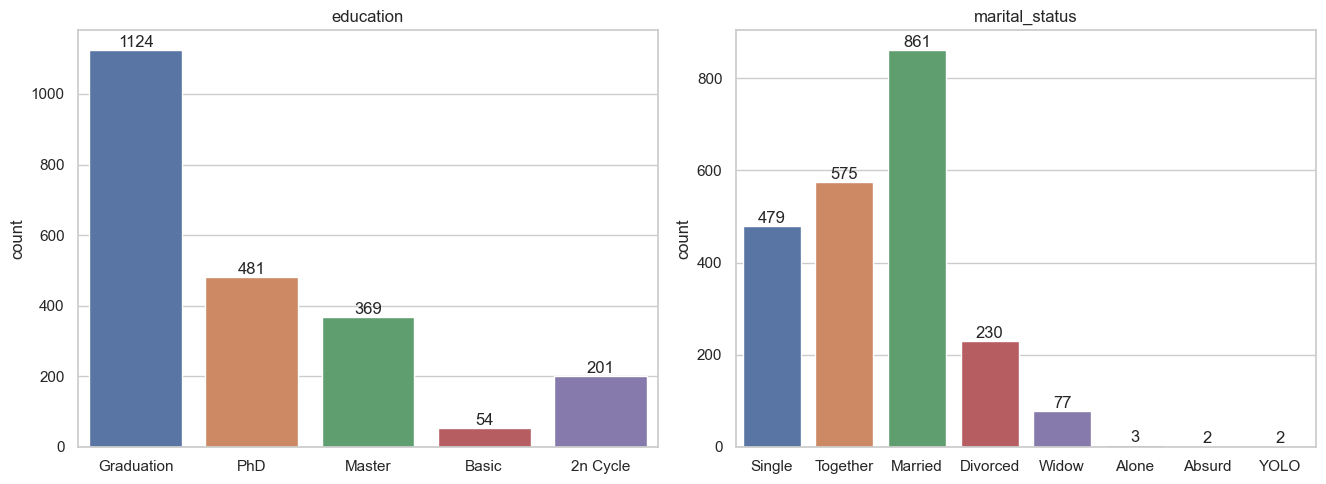

In [22]:
sns_plots(data=df, features=categorical_features, countplot=True)

Insights:
1. Most of the customers are graduated and have partners.

### Bivariate and multivariate analysis
I will do bivariate and multivariate analysis below in order to see how the features are related to each other.

### Correlation matrix
I will examine the correlation matrix in order to identify any linear relationships between the features in the data, assessing the strength and direction of these relationships.

In [23]:
corr_matrix = df.corr(numeric_only=True)

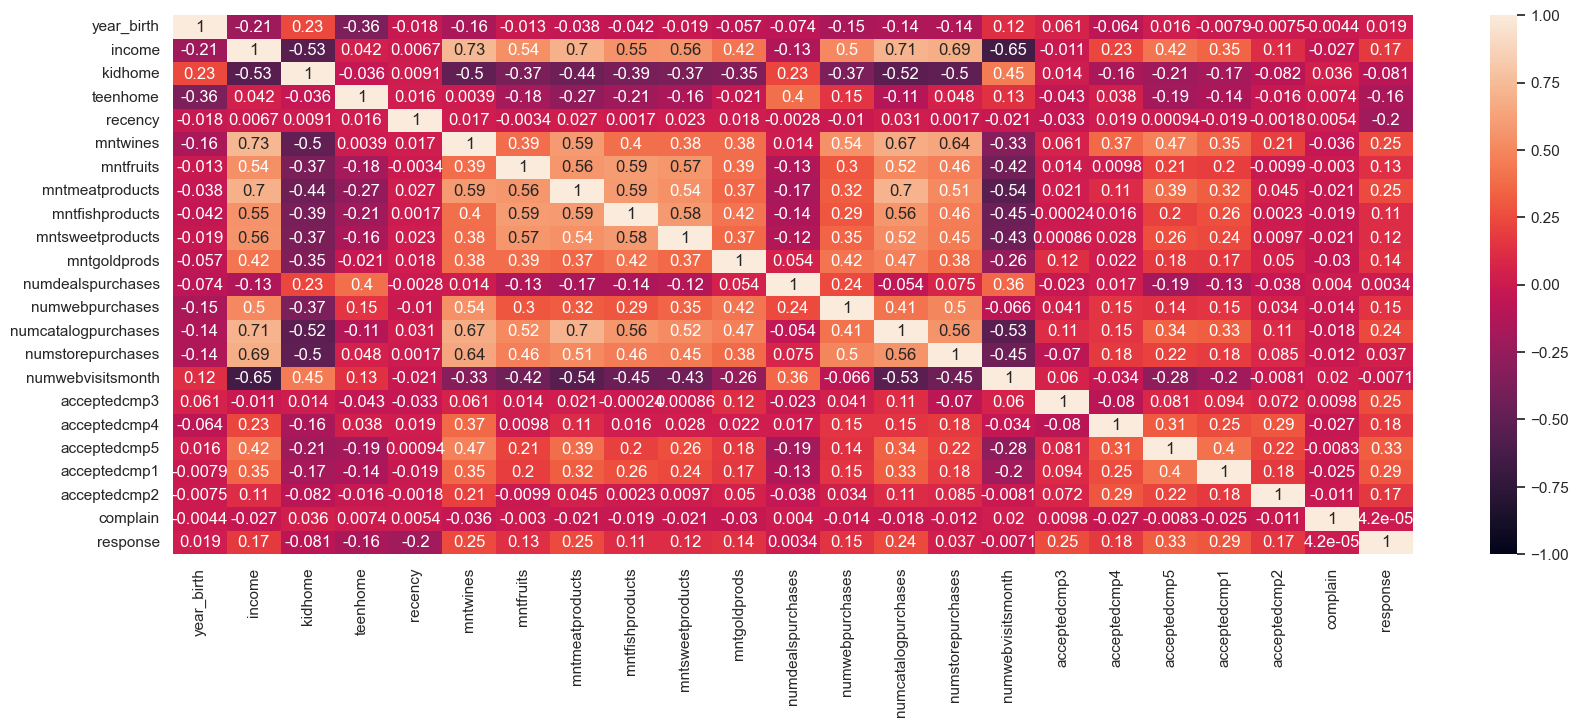

In [24]:
plt.figure(figsize=(20, 7))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

Insights:
1. Income and kidhome are strongly negatively correlated. This indicates that customers who have higher incomes tend to have less or no children, and vice-versa.
2. Income and the amount spent on products like meat and wines are strongly positively correlated. This makes total sense to me. Since meat and wines are expensive products, customers with higher incomes tend to buy it more, and vice-versa.
3. Income and the number of catalog and store purchases are strongly positively correlated. This indicates that customers who have higher incomes tend to purchase more in these ways. Moreover, income is strongly negatively correlated with the number of web visits per month. The retail company must be alert with these informations. Clients who hold higher incomes are the best ones. Thus, it must focus on improving its catalog and store purchasing experiences.
4. Customers who have higher incomes tend to accept more campaigns.
5. Teenhome and the number of deals purchases are moderately positively correlated. This indicates that customers who have more teenagers at home tend to search for discounts in its purchases.
6. As expected, recency is not significantly correlated with any of the features. I saw above that its distribuition is almost uniform, not presenting any trend. Moreover, complain also doesn't show any significant correlation with any of the attributes.
7. Kidhome and the number of web visits per month are strongly positively correlated. This indicates that customers who have more kids at home tend to make more web visits in a month, and vice-versa.
8. The number of web visits per month is strongly negatively correlated with features representing the amount spent on different product types. This indicates that these products tend to be bought in other ways, such as store and catalog. Moreover, it is moderately positively correlated with the number of deals purchases. This means that customers who make more visits to the store's website tend to purchase with discounts.

Let's take a look at campaigns 1 and 5 with respect to income and amount spent on wine and meat products.

In [25]:
campaigns_analysis = df.copy()
labels = ['$1500-$10000', '$10001-$20000', '$20001-$30000', '$30001-$40000', '$40001-$50000', '$50001-$60000', '$60001-$70000', '$70001-$80000', '$80001-$90000', '$90001-$100000', '>$100000']
bin_edges = [1500, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 115000]
campaigns_analysis['income_cat'] = pd.cut(x=campaigns_analysis['income'], bins=bin_edges, labels=labels)

In [26]:
campaigns_analysis.groupby(['income_cat'])[['acceptedcmp5', 'acceptedcmp1']].mean()

,acceptedcmp5,acceptedcmp1
income_cat,,
$1500-$10000,0.000000,0.000000
$10001-$20000,0.000000,0.000000
$20001-$30000,0.000000,0.000000
$30001-$40000,0.000000,0.002770
$40001-$50000,0.000000,0.006098
$50001-$60000,0.006349,0.012698
$60001-$70000,0.033133,0.051205
$70001-$80000,0.151203,0.161512
$80001-$90000,0.423313,0.294479


- Clearly, there is a trend. The higher the income, the higher the proportion of accepted campaigns.
- The campaigns 1 and 5 were effective for customers who have incomes higher than $70,000.00. Particularly, 80% of those with incomes higher than $80,000.0 accepted them. However, once the majority of the clients have lower incomes, the total proportion of accepted campaigns is low.

In [27]:
bin_edges = list(range(0, 1600, 250))  
labels = ['$0-$250', '$251-$500', '$501-$750', '$751-$1000', '$1001-$1250', '$1251-$1500']
campaigns_analysis['mntwines_cat'] = pd.cut(x=campaigns_analysis['mntwines'], bins=bin_edges, labels=labels)

bin_edges = list(range(0, 1800, 250))  
labels = ['$0-$250', '$251-$500', '$501-$750', '$751-$1000', '$1001-$1250', '$1251-$1500', '$1501-1750']
campaigns_analysis['mntmeat_cat'] = pd.cut(x=campaigns_analysis['mntmeatproducts'], bins=bin_edges, labels=labels)

In [28]:
campaigns_analysis.groupby(['mntwines_cat'])[['acceptedcmp5', 'acceptedcmp1']].mean().fillna(0)

,acceptedcmp5,acceptedcmp1
mntwines_cat,,
$0-$250,0.007137,0.009516
$251-$500,0.035806,0.061381
$501-$750,0.120141,0.116608
$751-$1000,0.276471,0.205882
$1001-$1250,0.444444,0.370370
$1251-$1500,0.733333,0.333333


In [29]:
campaigns_analysis.groupby(['mntmeat_cat'])[['acceptedcmp5', 'acceptedcmp1']].mean().fillna(0)

,acceptedcmp5,acceptedcmp1
mntmeat_cat,,
$0-$250,0.021663,0.024005
$251-$500,0.186885,0.154098
$501-$750,0.268116,0.231884
$751-$1000,0.413333,0.320000
$1001-$1250,0.000000,0.000000
$1251-$1500,0.000000,0.000000
$1501-1750,0.000000,0.000000


Clearly the campaigns 1 and 5 were effective in achieving higher income customers with respect to the amount spent on wine and meat products. It is possible to see that the proportion of customers who accepted campaigns is higher in higher amounts spent. 

### Pairplot
I will take a quick look in the pairplot in order to assess wheter there is any non-linear relationship that I wasn't able to detect with pearson correlations.

In [30]:
# plt.figure(figsize=(25, 6))
# sns.pairplot(data=df)
# plt.show()

Apparently, there aren't significant non-linear relationships.

### Feature engineering
I will do some feature engineering in order to extract the maximum information as possible from the available attributes.

In [31]:
df.columns

Index(['year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response'],
      dtype='object')

There are categories in education and marital status that can be merged together into one. Particularly, some of these categories, such as YOLO, Absurd and Alone, have very low proportions, favoring even more our strategy. This will reduce features cardinality while preserving the original information.

In [32]:
print(df['education'].value_counts(normalize=True))
print()
print(df['marital_status'].value_counts(normalize=True))

education
Graduation    0.504262
PhD           0.215792
Master        0.165545
2n Cycle      0.090175
Basic         0.024226
Name: proportion, dtype: float64

marital_status
Married     0.386272
Together    0.257963
Single      0.214895
Divorced    0.103185
Widow       0.034545
Alone       0.001346
Absurd      0.000897
YOLO        0.000897
Name: proportion, dtype: float64


In [33]:
df['education'] = df['education'].map({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Undergraduate', 'Basic': 'Undergraduate'})
df['marital_status'] = df['marital_status'].map({'Single': 'Single', 'Divorced': 'Single', 'Widow': 'Single', 'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single', 'Married': 'Partner', 'Together': 'Partner'})

In [34]:
print(df['education'].value_counts(normalize=True))
print()
print(df['marital_status'].value_counts(normalize=True))

education
Graduate         0.504262
Postgraduate     0.381337
Undergraduate    0.114401
Name: proportion, dtype: float64

marital_status
Partner    0.644235
Single     0.355765
Name: proportion, dtype: float64


Creating a feature indicating the total number of campaigns accepted.

In [35]:
df['total_accepted_cmp'] = df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5']
df['total_accepted_cmp'].value_counts(normalize=True)

total_accepted_cmp
0    0.792732
1    0.145357
2    0.037236
3    0.019740
4    0.004935
Name: proportion, dtype: float64

Creating a feature indicating the total number of children at home, whatever they are teenhome or kidhome.

In [36]:
df['children'] = df['kidhome'] + df['teenhome']
df['children'].value_counts(normalize=True)

children
1    0.503813
0    0.283984
2    0.188425
3    0.023777
Name: proportion, dtype: float64

Creating a feature indicating customer's age.

In [37]:
df['age'] = 2023 - df['year_birth']
df['age'].describe().T

count    2229.000000
mean       54.111261
std        11.707430
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: age, dtype: float64

Creating RFM model's features. Recency is already present in the dataset.
- Recency: Time since last customer's purchase.
- Frequency: Number of purchases in a time interval.
- Monetary: Total amount spent by the customer.

Creating a feature indicating the total number of purchases made by a customer to get the frequency.

In [38]:
df['total_purchases'] = df['numcatalogpurchases'] + df['numdealspurchases'] + df['numstorepurchases'] + df['numwebpurchases']

In [39]:
df['total_purchases'].describe().T

count    2229.000000
mean       14.869000
std         7.622187
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        43.000000
Name: total_purchases, dtype: float64

Creating a relationship duration (in years, because of the long relationships present in the data) feature to get the frequency.

In [40]:
current_date = datetime.today()
df['relationship_duration'] = (current_date.year - df['dt_customer'].dt.year) 

Creating the frequency variable.

In [41]:
df['frequency'] = df['total_purchases'] / df['relationship_duration']
df['frequency'].describe().T

count    2229.000000
mean        1.488458
std         0.754174
min         0.000000
25%         0.777778
50%         1.500000
75%         2.100000
max         4.300000
Name: frequency, dtype: float64

Creating a monetary feature, indicating the total amount spent on company's products by the customer.

In [42]:
df['monetary'] = df['mntfishproducts'] + df['mntfruits'] + df['mntgoldprods'] + df['mntmeatproducts'] + df['mntsweetproducts'] + df['mntwines']
df['monetary'].describe().T

count    2229.000000
mean      605.541050
std       601.032228
min         5.000000
25%        69.000000
50%       397.000000
75%      1044.000000
max      2525.000000
Name: monetary, dtype: float64

Creating a feature indicating the average purchase value.

In [43]:
df['avg_purchase_value'] = df['monetary'] / df['total_purchases'].replace(0, np.nan)
df['avg_purchase_value'].describe().T

count    2227.000000
mean       33.274270
std        45.040897
min         0.533333
25%         9.714286
50%        23.352941
75%        45.281773
max      1679.000000
Name: avg_purchase_value, dtype: float64

- I will drop complain because it is too much imbalanced, being almost constant. 
- I will drop response because its information is already contained in acceptedcmp features and it is too much imbalanced as well. 
- I will drop kidhome and teenhome because children represents the same information.
- I will drop the different acceptedcmp because total_accepted_cmp will be much more useful for the analysis, once our objective now is to build NEW targeted campaigns.
- I will drop dt_customer because it will not be useful for clustering modelling.
- I will drop year_birth because its information is already contained in age column.

In [44]:
df.drop(columns=['kidhome', 'teenhome', 'complain', 'response', 
                 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 
                 'acceptedcmp4', 'acceptedcmp5', 'dt_customer',
                 'year_birth'], inplace=True)

In [45]:
df.columns

Index(['education', 'marital_status', 'income', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'total_accepted_cmp', 'children', 'age', 'total_purchases',
       'relationship_duration', 'frequency', 'monetary', 'avg_purchase_value'],
      dtype='object')

In [46]:
print(f'Final dataset for clustering modelling shape: {df.shape}')

Final dataset for clustering modelling shape: (2229, 23)


### Exploring the data used for modelling
I will quickly explore some of the new features created because it might contain valuable information for modelling and post segmentation analysis.

In [47]:
new_features = ['total_accepted_cmp', 'children', 'age', 'total_purchases', 'relationship_duration', 'frequency', 'monetary', 'avg_purchase_value']

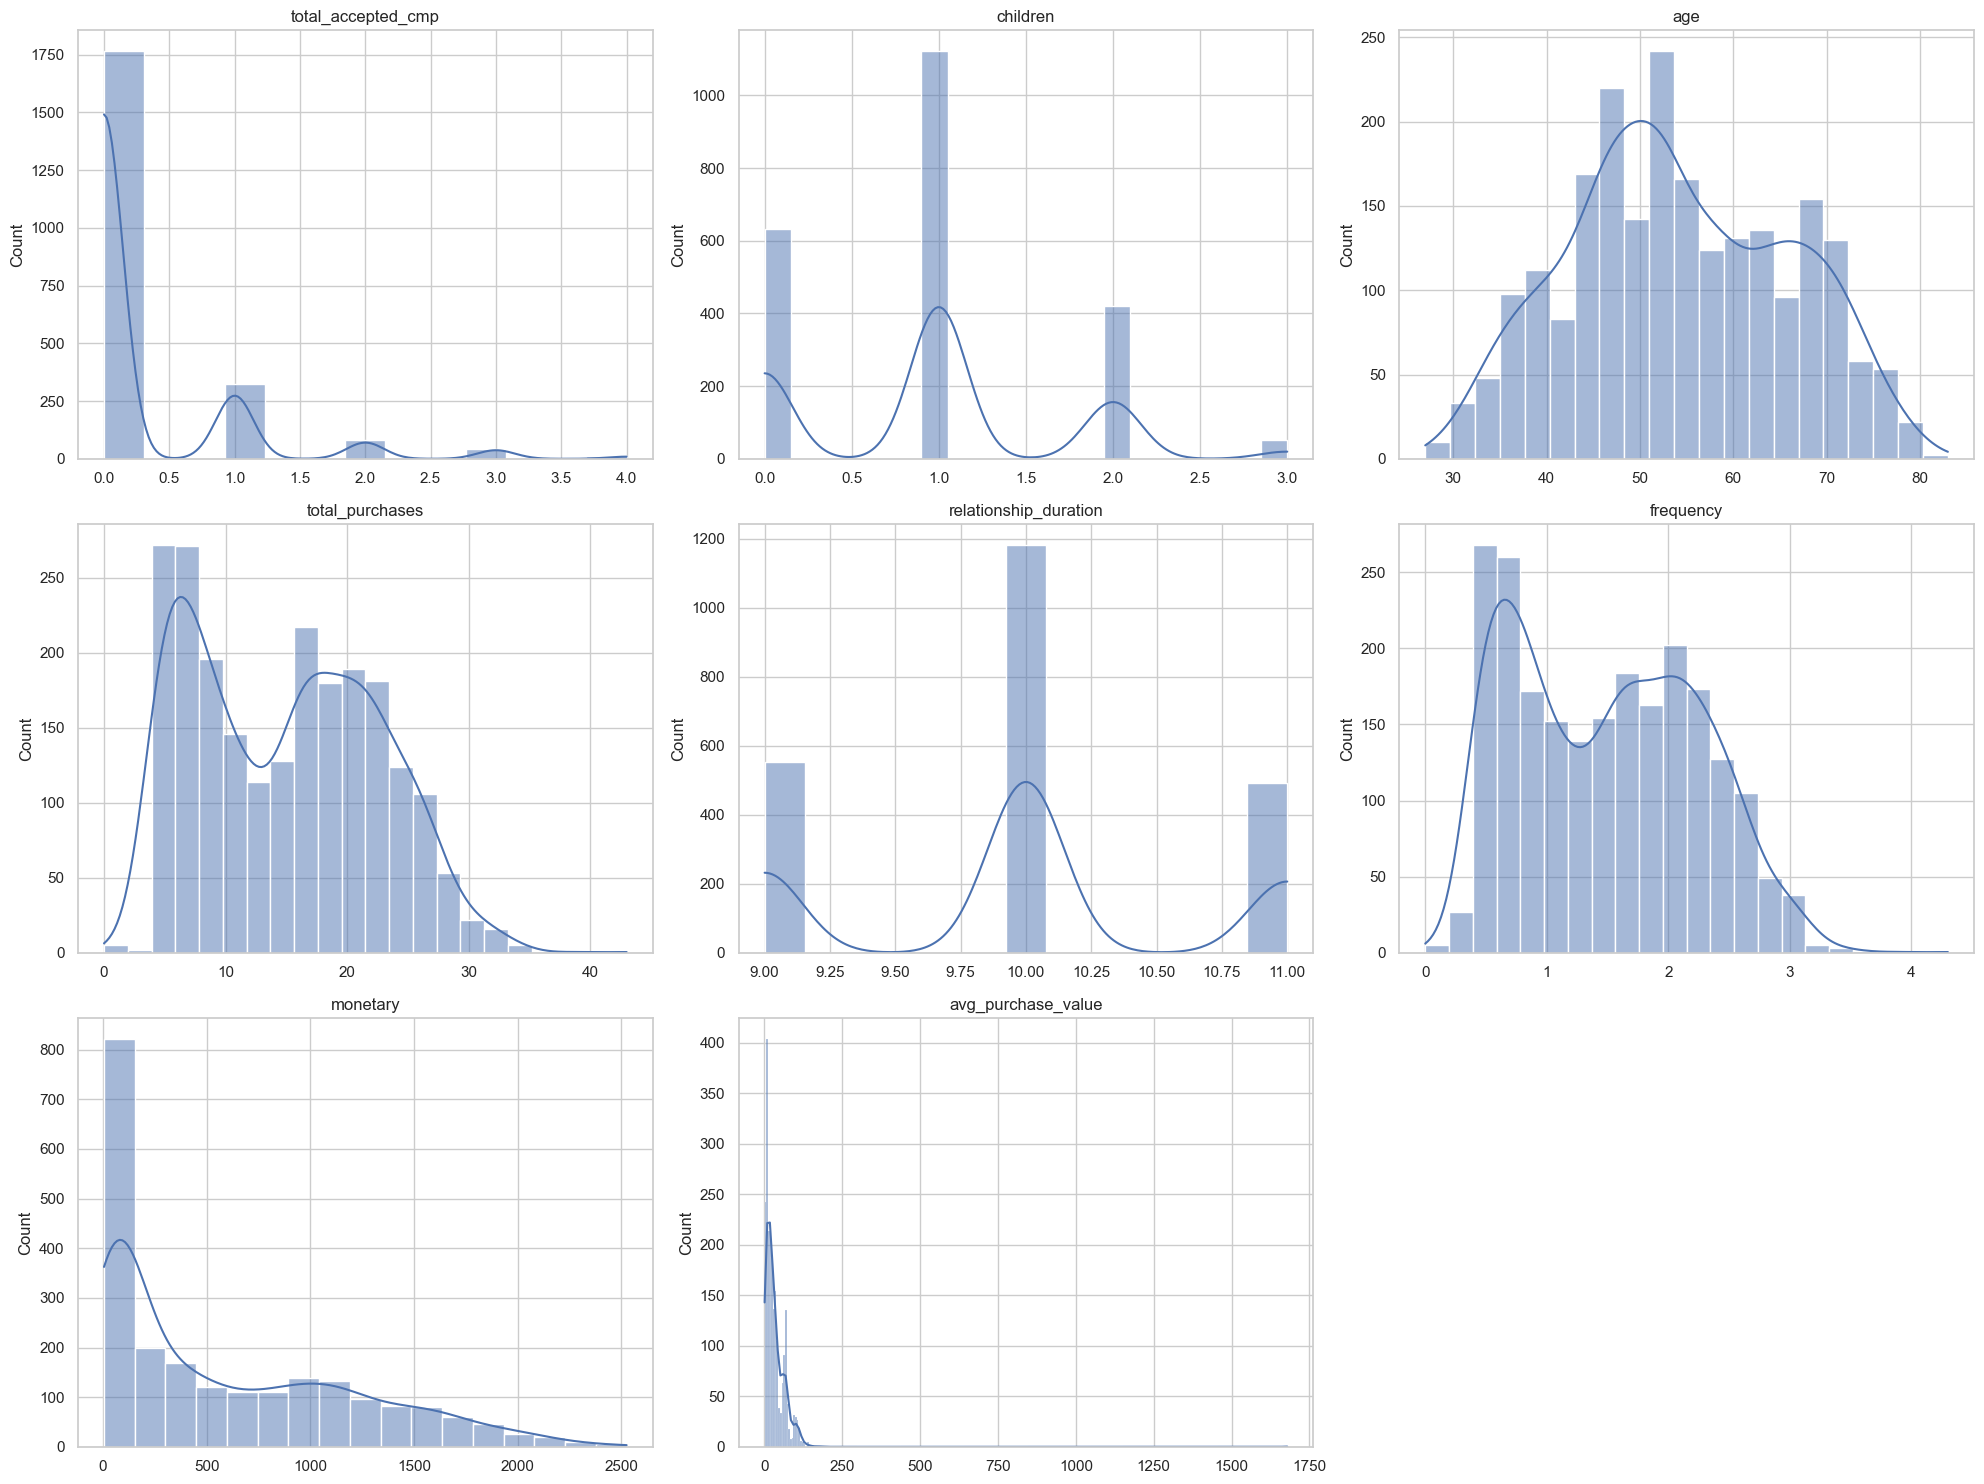

In [48]:
sns_plots(data=df, features=new_features, histplot=True, kde=True)

Insights:
1. Total purchases has two peaks. One is close to 10 purchases and the other is around 20 purchases.
2. Most of the customers have a 10 years relationship with the company.
3. Frequency also has two peaks. One is close to 1 and the other is around 2 purchases per year.
4. Monetary is right-skewed. This indicates that most of the customers spent low amounts of money on the store's products, while there are some outliers, which spent much more.
5. Average order value also seems to be right-skewed, with a lot of outliers as well.

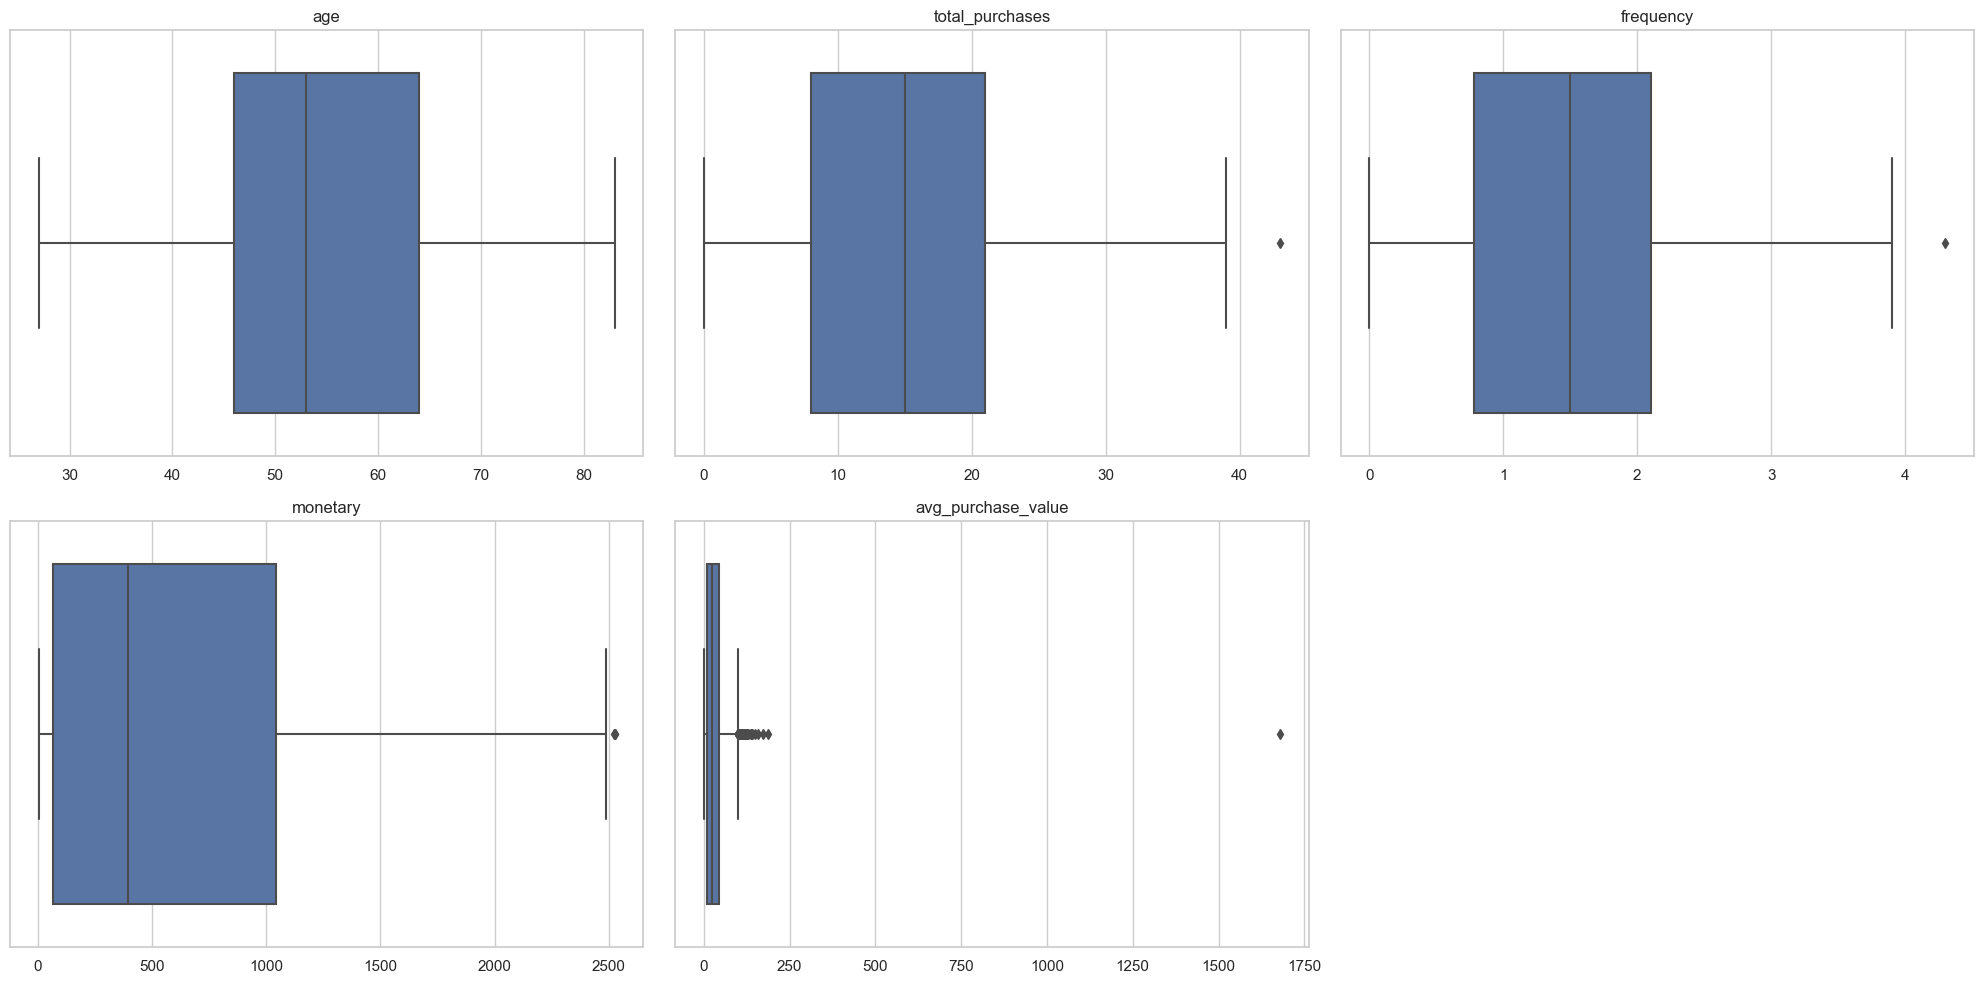

In [49]:
new_features_outliers = ['age', 'total_purchases', 'frequency', 'monetary', 'avg_purchase_value']

sns_plots(data=df, features=new_features_outliers, outliers=True)

There is an outlier in avg_purchase_value that is very discrepant from the other points. I will investigate it below. For the other anomalies, everything seems to be ok.

In [50]:
df.loc[df['avg_purchase_value'] > 1500]

,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numstorepurchases,numwebvisitsmonth,total_accepted_cmp,children,age,total_purchases,relationship_duration,frequency,monetary,avg_purchase_value
2228,Undergraduate,Partner,NaN,53,32,2,1607,12,4,22,...,1,0,1,0,45,1,11,0.090909,1679,1679.0


It doesn't represent inconsistent information. However, this customer made one purchase in 11 years of relationship. Thus, I will remove him from the data since it might not be a client anymore.

In [51]:
df.drop(df.loc[df['avg_purchase_value'] > 1500].index, inplace=True)

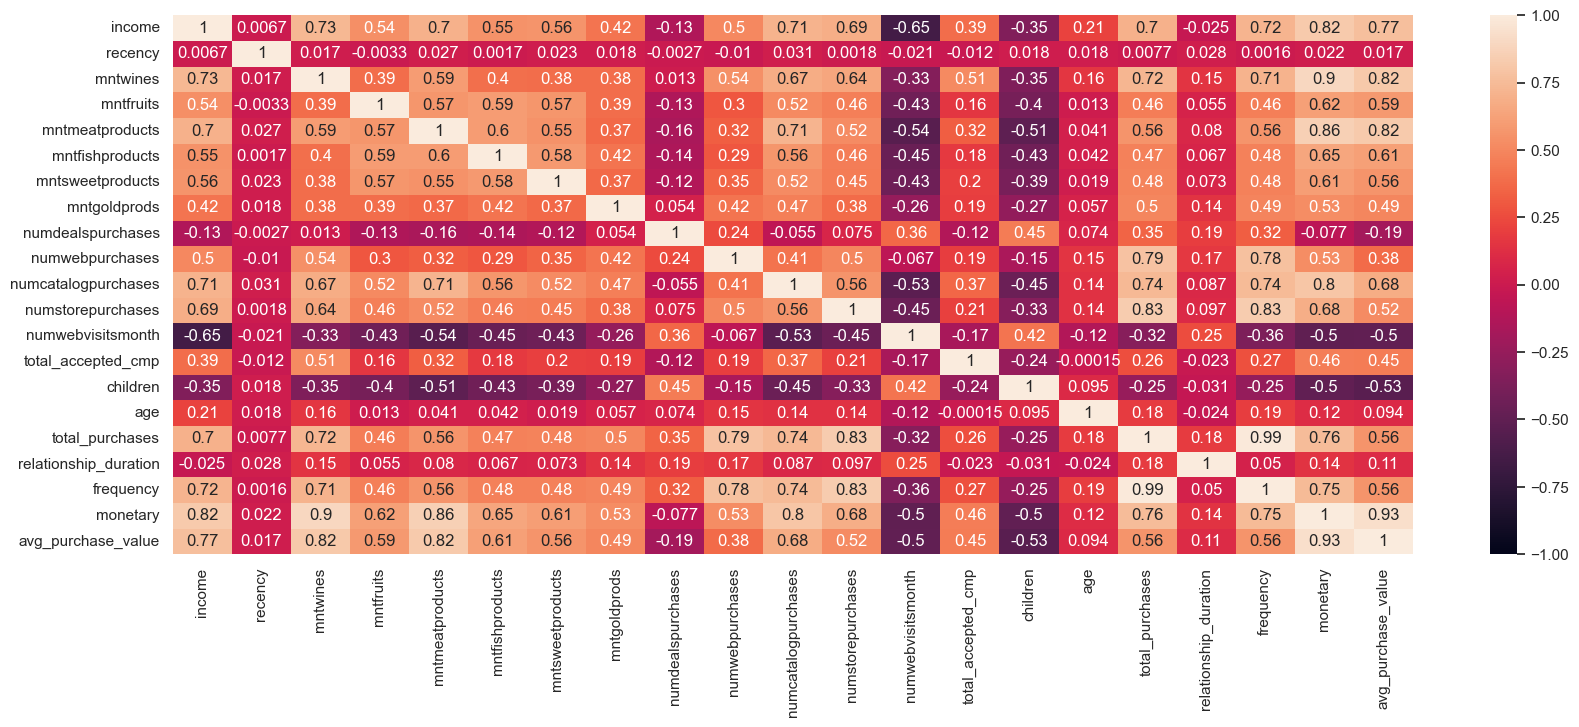

In [52]:
plt.figure(figsize=(20, 7))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
plt.show()

Insights:
1. The same kind of patterns are present. Customers with higher incomes tend to have higher frequency, monetary, total_purchases and avg_purchase_value. Moreover, customers with less children tend to be financially better and spend more money on the store's products.
2. I will drop total_purchases because it represents the same information that frequency (0.99) correlation. It is redundant.

In [53]:
df.drop(columns=['total_purchases'], inplace=True)

### EDA Conclusions
Main insights:
1. Features representing the amount spent on a product are right-skewed. This means that most of the customers spent lower amounts, while some spent higher amounts of money. Particularly, wine represents the product type with the highest average amount spent.
2. Features representing the number of purchases are also a bit right-skewed. In general, customers tend to make more purchases on web or at the store. There are some outliers in all of these features meaning customers that make lots of purchases.
3. The store's campaigns are not being effective! The proportion of customers who accepted any of the campaigns is very low. This motivates our clustering analysis! Probably the company is promoting the same campaigns for all the clientele. By segmenting the customers, it will be possible to make targeted campaigns, improving this alarmant indicator.
4. Most of the customers have no children. Some of them have 1 kidhome or teenhome. Very few have two. Moreover, most of the customers are graduate and have a partner.
5. Income and kidhome are strongly negatively correlated. This indicates that customers who have higher incomes tend to have less or no children, and vice-versa.
6. Income and the amount spent on products like meat and wines are strongly positively correlated. This makes total sense to me. Since meat and wines are expensive products, customers with higher incomes tend to buy it more, and vice-versa.
7. Income and the number of catalog and store purchases are strongly positively correlated. This indicates that customers who have higher incomes tend to purchase more in these ways. Moreover, income is strongly negatively correlated with the number of web visits per month. The retail company must be alert with these informations. Clients who hold higher incomes are the best ones. Thus, it must focus on improving its catalog and store purchasing experiences.
8. Customers who have higher incomes tend to accept more campaigns.
9. Teenhome and the number of deals purchases are moderately positively correlated. This indicates that customers who have more teenagers at home tend to search for discounts in its purchases.
10. The number of web visits per month is strongly negatively correlated with features representing the amount spent on different product types. This indicates that these products tend to be bought in other ways, such as store and catalog. Moreover, it is moderately positively correlated with the number of deals purchases. This means that customers who make more visits to the store's website tend to purchase with discounts.
11. Clearly the campaigns 1 and 5 were effective in achieving higher income customers with respect to the amount spent on wine and meat products. It was possible to see that the proportion of customers who accepted campaigns was higher in higher amounts spent. 